# Pryngles module

In [1]:
from pryngles import *

## External modules

In [2]:
sci=Science
print_df=Misc.print_df

## Planet class

In [5]:
class PlanetDefaults(object):
    """
    These are the default attributes for bodies of the kind 'Planet'.
    
    DEVELOPER:
        You may add new attributes as the model gets more complex.
        Please document properly each attribute.
        
    """

    orbit=dict(
        m=1.0,
        a=1.0,
        e=0.0
    )
    
    physics=dict(
        radius=1.0,
        prot=1,
        i=0,#Inclination of the rotational axis
        roll=0,
        alpha=0,#Zero meridian
        t0=0,
    )
    
    optics=dict(
        nspangles=1000,
    )

In [6]:
BODY_KINDS+=["Planet"]

class Planet(Body):
    """A star.

    Initialization attributes:
        
        primary: Class Body, default = None:
            Object in the center of the orbit of the star for specification purposes.
            If None the object is the center of the orbit specification for other objects.

        orbit:

            These attributes should be compatible with rebound.

            m: float [um], default = 1
                Mass of the planet.  If m = 0 the body does not produce gravitation.

            a: float [ul], default = 1.0
                Semi major axis of the orbit with respect to primary.

            e: float, default = 0.0
                Eccentricity of the orbit with respect to primary.

        physics:

            radius: float [ul], default = 1:
                Radius of the star.

            prot: float [ut], default = 1:
                Period of rotation of the star.
                
            i: float [rad], default = 0:
                Inclination of the ring with respect to the ecliptic plane.

            roll: float [rad], default = 0:
                Roll angle.  This is the angle with respect to ecliptic x-axis in which 
                the normal to the ring plane is rotated.
                
            alpha_equ: float [rad], default = 0:
                Longitude of the zero meridian of the object.
                
            t0: float [ut], default = 0:
                Initial time for zero meridian.

        optics:

            nspangles: int, default = 1000
                Number of spangles on which the object will be discretized.

    Derived attributes:
    
        physics:
            
            wrot: float [rad/ut]:
                Rotational angular velocity.
                
            n_equ: array(3):
                Rotational axis vector.
    
    Methods:
    
        update_body(**pars):

            This method compute some derived attributes like.

    Notes:

        See Body class documentation.
    
    """
    
    def __init__(self,
                 primary=None,
                 orbit=PlanetDefaults.orbit,
                 physics=PlanetDefaults.physics,
                 optics=PlanetDefaults.optics
                ):
        
        
        #Instantiate object with basic properties
        Body.__init__(self,PlanetDefaults,"Planet",primary,orbit,physics,optics)
        
        #Check primary
        if self.primary is None:
            raise ValueError(f"Primary not provided and it is mandatory for {self.kind}.")
        
        #Update properties
        self.update_body(**self.__dict__)
        
    def update_body(self,**pars):
        Body.update_body(self,**pars)
        
        #Rotational angular velocity
        self.physics.wrot=2*np.pi/self.physics.prot
        
        #Rotation axis:
        self.physics.n_equ=sci.cartesian([1,self.physics.roll,90*Consts.deg-self.physics.i])

In [7]:
if IN_JUPYTER:
    def test_planet(self):
        S=Star()

        #Check exception: primary is mandatory for planets
        self.assertRaises(ValueError,lambda:Planet())

        P=Planet(primary=S)
        
        print(P.physics)
        print(P.hash)
        
        #Check derived properties
        self.assertEqual(np.isclose([P.physics.wrot],
                                    [2*np.pi/PlanetDefaults.physics["prot"]],
                                    rtol=1e-7),
                         [True]*1)
        
        P.update_body(orbit=dict(a=5),physics=dict(rho=0.2))
        print(P.orbit,P.physics)
        
        #Check exception: primary could not be different from None or Body
        self.assertRaises(AssertionError,lambda:Planet(primary="Nada"))
        
    class Test(unittest.TestCase):pass    
    Test.test_planet=test_planet
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

.

{'radius': 1.0, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 't0': 0, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00])}
8763129695832
{'m': 1.0, 'a': 5, 'e': 0.0} {'radius': 1.0, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 't0': 0, 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00]), 'rho': 0.2}



----------------------------------------------------------------------
Ran 1 test in 0.013s

OK


In [9]:
def spangle_body(self,seed=0):
    """
    Spangle the surface of the planet
    """
    
    #Create spangler
    self.sp=Spangler(
        nspangles=self.optics.nspangles,
        body_hash=self.hash,
        spangle_type=STAR_SPANGLE,
        n_equ=self.physics.n_equ,
        alpha_equ=self.physics.alpha,
        w_equ=self.physics.wrot,
        t0_equ=self.physics.t0,
    )
    
    #Populate spangler
    self.sp.populate_spangler(
        scale=self.physics.radius,
        seed=seed,
        geometry="sphere",        
    )

Planet.spangle_body=spangle_body

,body_hash,type,dim,scale,center_ecl,x_ecl,y_ecl,z_ecl,r_ecl,q_ecl,f_ecl,ns_ecl,x_obs,y_obs,z_obs,r_obs,q_obs,f_obs,ns_obs,x_luz,y_luz,z_luz,r_luz,q_luz,f_luz,ns_luz,n_equ,alpha_equ,center_equ,x_equ,y_equ,z_equ,r_equ,q_equ,f_equ,ns_equ,w,t0,asp,dsp,albedo_gray_normal,tau_gray_optical,unset,visible,shadow,illuminated,transit,indirect,occult,emit,hidden
982,8763109507100,3,3,1.0,"[0, 0, 0]",0.071320,-0.113281,0.991,1.0,5.274279,1.436531,"[0.07131981387015364, -0.1132805550371574, 0.9910000000000001]",0.071320,-0.113281,0.991,1.0,5.274279,1.436531,"[0.07131981387015364, -0.1132805550371574, 0.9910000000000001]",0.071320,-0.113281,0.991,1.0,5.274279,1.436531,"[0.07131981387015364, -0.1132805550371574, 0.9910000000000001]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",-0.113281,-0.071320,0.991,1.0,3.703483,1.436531,"[-0.1132805550371574, -0.07131981387015358, 0.9910000000000001]",0,0,0.012732,0.127321,1,0.0,0,1,0,1,0,0,0,0,0
983,8763109507100,3,3,1.0,"[0, 0, 0]",0.021116,0.116212,0.993,1.0,1.391057,1.452406,"[0.02111567140202272, 0.11621156750186974, 0.9930000000000001]",0.021116,0.116212,0.993,1.0,1.391057,1.452406,"[0.02111567140202272, 0.11621156750186974, 0.9930000000000001]",0.021116,0.116212,0.993,1.0,1.391057,1.452406,"[0.02111567140202272, 0.11621156750186974, 0.9930000000000001]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",0.116212,-0.021116,0.993,1.0,6.103446,1.452406,"[0.11621156750186974, -0.021115671402022657, 0.9930000000000001]",0,0,0.012732,0.127321,1,0.0,0,1,0,1,0,0,0,0,0
984,8763109507100,3,3,1.0,"[0, 0, 0]",-0.079543,-0.060397,0.995,1.0,3.791020,1.470755,"[-0.07954339409532818, -0.06039742093661811, 0.9950000000000001]",-0.079543,-0.060397,0.995,1.0,3.791020,1.470755,"[-0.07954339409532818, -0.06039742093661811, 0.9950000000000001]",-0.079543,-0.060397,0.995,1.0,3.791020,1.470755,"[-0.07954339409532818, -0.06039742093661811, 0.9950000000000001]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",-0.060397,0.079543,0.995,1.0,2.220224,1.470755,"[-0.06039742093661811, 0.07954339409532823, 0.9950000000000001]",0,0,0.012732,0.127321,1,0.0,0,1,0,1,0,0,0,0,0
985,8763109507100,3,3,1.0,"[0, 0, 0]",0.077073,-0.007126,0.997,1.0,6.190983,1.493317,"[0.07707278097599521, -0.007126460034689422, 0.9970000000000001]",0.077073,-0.007126,0.997,1.0,6.190983,1.493317,"[0.07707278097599521, -0.007126460034689422, 0.9970000000000001]",0.077073,-0.007126,0.997,1.0,6.190983,1.493317,"[0.07707278097599521, -0.007126460034689422, 0.9970000000000001]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",-0.007126,-0.077073,0.997,1.0,4.620187,1.493317,"[-0.007126460034689422, -0.07707278097599515, 0.9970000000000001]",0,0,0.012732,0.127321,1,0.0,0,1,0,1,0,0,0,0,0
986,8763109507100,3,3,1.0,"[0, 0, 0]",-0.030047,0.033108,0.999,1.0,2.307761,1.526071,"[-0.030047188215352145, 0.03310840498047211, 0.9990000000000001]",-0.030047,0.033108,0.999,1.0,2.307761,1.526071,"[-0.030047188215352145, 0.03310840498047211, 0.9990000000000001]",-0.030047,0.033108,0.999,1.0,2.307761,1.526071,"[-0.030047188215352145, 0.03310840498047211, 0.9990000000000001]","[6.123233995736766e-17, 0.0, 1.0]",0,"[0, 0, 0]",0.033108,0.030047,0.999,1.0,0.736965,1.526071,"[0.03310840498047211, 0.030047188215352207, 0.9990000000000001]",0,0,0.012732,0.127321,1,0.0,0,1,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>


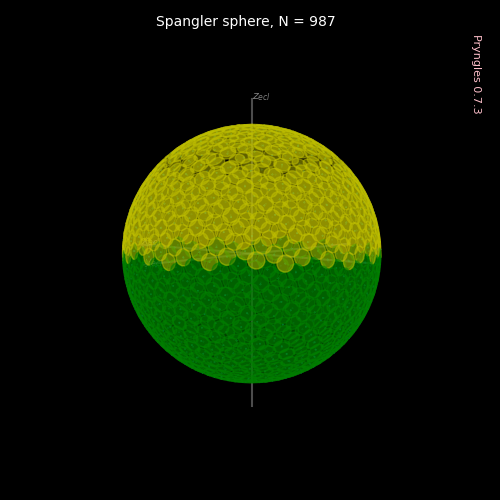

.
----------------------------------------------------------------------
Ran 1 test in 1.612s

OK


In [13]:
if IN_JUPYTER:
    def test_sp(self):
        S=Star()
        P=Planet(primary=S)
        P.spangle_body()
        print_df(P.sp.data.tail())
        P.sp.plot3d()
        
    class Test(unittest.TestCase):pass    
    Test.test_sp=test_sp
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

--End--